<a href="https://colab.research.google.com/github/gadyari/DeepLearning/blob/main/DL_1_imgClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
from tensorflow import keras
from keras.constraints import MaxNorm
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from keras.datasets import cifar10
import matplotlib.pyplot as plt


(x_train,y_train),(x_test,y_test)= cifar10.load_data()
y_train

x_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


(50000, 32, 32, 3)

# New Section

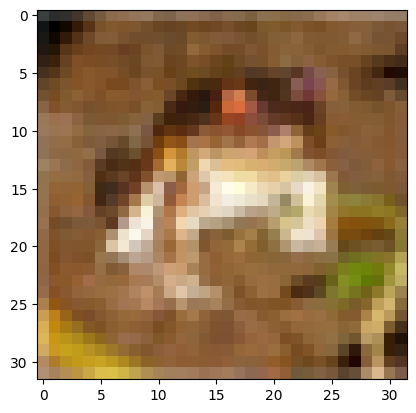

In [ ]:
y_train[0]
plt.imshow(x_train[0])

In [ ]:
x_train= x_train.astype('float32')
x_test= x_test.astype('float32')
x_train= x_train/255.0
x_test= x_test/255.

In [ ]:
y_train= to_categorical(y_train)
y_test= to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [ ]:
num_class = y_test.shape[1]

# **Building the Model**

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=x_train.shape[1:], activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(num_class, activation = 'softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         262,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │              

 Total params: 393,962 (1.50 MB)

 Trainable params: 393,322 (1.50 MB)

 Non-trainable params: 640 (2.50 KB)

# **Training the model**

In [ ]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=64)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.3852 - loss: 1.7484 - val_accuracy: 0.5637 - val_loss: 1.1977
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.6059 - loss: 1.1154 - val_accuracy: 0.6359 - val_loss: 1.0219
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6753 - loss: 0.9197 - val_accuracy: 0.6781 - val_loss: 0.9199
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7089 - loss: 0.8328 - val_accuracy: 0.7538 - val_loss: 0.6998
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7378 - loss: 0.7557 - val_accuracy: 0.7446 - val_loss: 0.7282
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7513 - loss: 0.7101 - val_accuracy: 0.7733 - val_loss: 0.6496
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7620 - loss: 0.6795 - val_accuracy: 0.7719 - val_loss: 0.6582
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7750 - loss: 0.6482 - val_accura

In [ ]:
for key,val in history.history.items():
  print(key)

accuracy
loss
val_accuracy
val_loss


<Axes: >

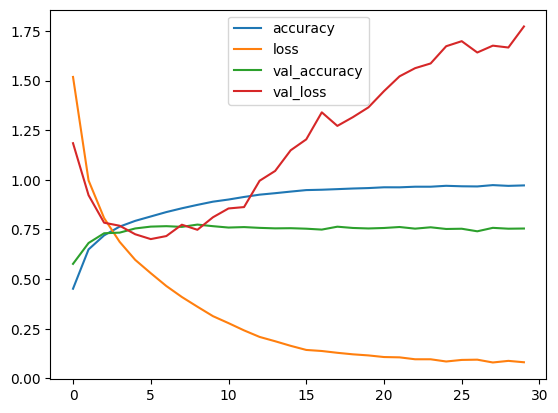

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()